In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
with open('../data/data-challenge-student.pickle', 'rb') as handle:
    # dat = pickle.load(handle)
    dat = pd.read_pickle(handle)

In [2]:
X = dat['X_train']
Y = dat['Y']
S = dat['S_train']

In [3]:
# how many ones in S 
print("S ones :",S.sum())
print("S zeros :",S.shape[0] - S.sum())
print("X shape :",X.shape)
print("Y shape :",Y.shape)
print("S shape :",S.shape)

S ones : 12793
S zeros : 14956
X shape : (27749, 768)
Y shape : (27749,)
S shape : (27749,)


In [22]:
# number of classes
print("Y unique :",Y.unique().shape[0])

print("Y value counts :",Y.value_counts())


Y unique : 28
Y value counts : profession_class
21    8285
19    2918
2     2273
18    1715
11    1402
13    1316
22    1295
26    1121
6      994
25     948
1      703
14     542
12     524
20     504
9      499
24     467
0      387
5      386
7      262
4      206
3      184
16     178
15     136
27     115
8      107
17      97
10      93
23      92
Name: count, dtype: int64


In [4]:
print("X head :",X.head())
print("Y head :",Y.head())
print("S head :",S.head())

X head :             0         1         2         3         4         5         6    \
28553 -0.107712  0.202686 -0.036410 -0.538686  0.162234 -0.109034 -0.075343   
6286   0.056359  0.003188 -0.726052 -0.616777  0.064091 -0.068786  0.384864   
36284 -0.331249  0.210670 -0.202662 -0.654994  0.307785 -0.254564 -0.165728   
12083 -0.565799  0.118481  0.185003 -0.692792 -0.056820  0.039130  0.241766   
7859  -0.669160 -0.052143 -0.708578 -0.159049 -0.273591  0.059959 -0.134847   

            7         8         9    ...       758       759       760  \
28553  0.202060 -0.120114 -0.540793  ...  0.058022 -0.117150  0.684212   
6286   0.363644 -0.285173 -0.430806  ... -0.049452 -0.587354 -0.004443   
36284  0.540352 -0.184862 -0.696042  ...  0.069515 -0.030068  0.616826   
12083 -0.113560 -0.138898 -0.768206  ... -0.071413 -0.310701  0.157026   
7859   0.045078 -0.308037 -0.585879  ... -0.018836 -0.473991  0.177165   

            761       762       763       764       765       766      

In [5]:
# dataframe of X
print("X describe :",X.describe())

X describe :                 0             1             2             3             4    \
count  27749.000000  27749.000000  27749.000000  27749.000000  27749.000000   
mean      -0.336415     -0.000947     -0.517365     -0.503902     -0.056925   
std        0.241738      0.248391      0.394988      0.259864      0.260024   
min       -1.650025     -1.140967     -1.930083     -1.560696     -1.098962   
25%       -0.490549     -0.166887     -0.780339     -0.670340     -0.237157   
50%       -0.333451     -0.000796     -0.509399     -0.494708     -0.062312   
75%       -0.176314      0.173093     -0.251268     -0.332255      0.111903   
max        0.643118      1.039149      0.745597      0.514842      1.146440   

                5             6             7             8             9    \
count  27749.000000  27749.000000  27749.000000  27749.000000  27749.000000   
mean      -0.028903      0.214925      0.304056     -0.136354     -0.273534   
std        0.248629      0.252762     

In [6]:
# print features of x correlated with y > 0.9
correlation = X.corrwith(Y)
print("correlation with Y > 0.5 :",correlation[correlation > 0.5])



correlation with Y > 0.5 : Series([], dtype: float64)


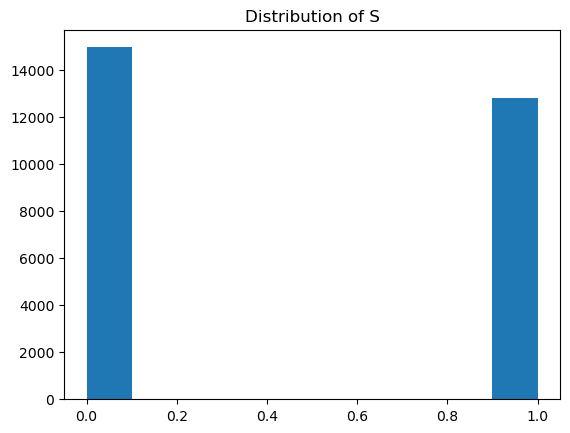

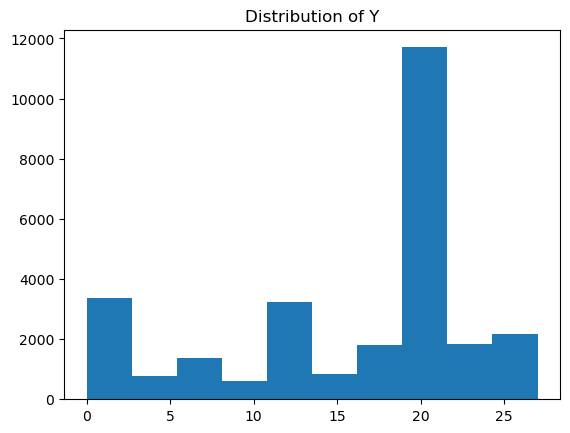

In [10]:
# visualize distribution of data
plt.hist(S)
plt.title('Distribution of S')
plt.show()

# visualize distribution of data
plt.hist(Y)
plt.title('Distribution of Y')
plt.show()

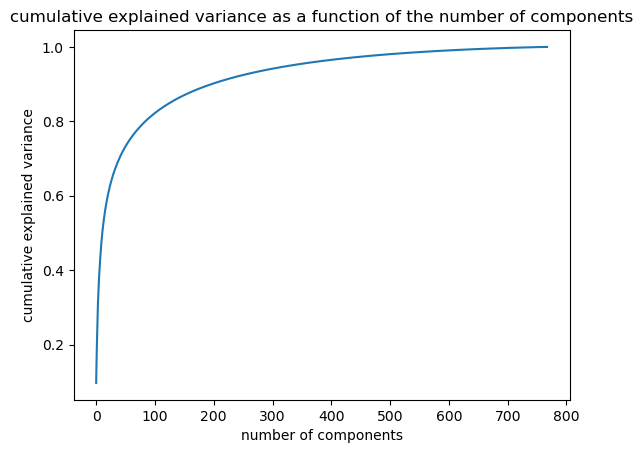

In [15]:
# Feature selection with pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
# cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(cumulative_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('cumulative explained variance as a function of the number of components')
plt.show()






In [19]:
# chose components that explain 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)
print("X_pca shape :",X_pca.shape)




X_pca shape : (27749, 332)


In [ ]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.MLP = nn.Sequential(
            nn.Linear(332, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 28),
            nn.Softmax()
        )

    def forward(self, x):
        logits = self.MLP(x)
        return logits

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, label)